# 测试

In [1]:
import torch
from transformers import AutoModel, AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained('./bert-base-chinese')
model = AutoModel.from_pretrained('./bert-base-chinese')               # 只想获取模型的表示（即隐藏状态）而不执行特定任务时
# model = AutoModelForMaskedLM.from_pretrained("./bert-base-chinese")  # 适用于需要进行掩码语言建模任务的模型，如BERT、RoBERTa、DeBERTa等，因为这些模型在预训练期间使用了掩码语言建模任务
model.eval()

sentences_1 = ["样例数据-1", "样例数据-2"]
sentences_2 = ["样例数据-3", "样例数据-4"]
with torch.no_grad():
    # 调用分词器
    encoded_input_1 = tokenizer(sentences_1, padding=True, truncation=True, return_tensors='pt')
    encoded_input_2 = tokenizer(sentences_2, padding=True, truncation=True, return_tensors='pt')
    # 前向传播推理
    model_output_1 = model(**encoded_input_1)
    model_output_2 = model(**encoded_input_2)
    # 
    embeddings_1 = model_output_1[0][:, 0]
    embeddings_2 = model_output_2[0][:, 0]
    similarity = embeddings_1 @ embeddings_2.T
    print(similarity)


/AuroraX-00/share_v4/songchentao/anaconda3/envs/DTransformer/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


tensor([[478.9747, 479.0029],
        [481.9769, 482.2135]])


In [2]:
# print(dict(model_output_1))
# print(dict(model_output_1).keys())
# print(type(model_output_1))

# print(torch.all(model_output_1.last_hidden_state == model_output_1[0]))
# print(torch.all(model_output_1.pooler_output == model_output_1[1]))

print(model_output_1.last_hidden_state.shape)  # torch.Size([2, 8, 1024])
print(model_output_1.pooler_output.shape)      # torch.Size([2, 1024])

print(encoded_input_1)
print(encoded_input_1["input_ids"].shape)      # torch.Size([2, 8])
tokens = tokenizer.convert_ids_to_tokens(encoded_input_1["input_ids"][0])
print(tokens)                                  # ['[CLS]', '样', '例', '数', '据', '-', '1', '[SEP]']
tokens = tokenizer.convert_ids_to_tokens(encoded_input_1["input_ids"][1])
print(tokens)

torch.Size([2, 8, 768])
torch.Size([2, 768])
{'input_ids': tensor([[ 101, 3416,  891, 3144, 2945,  118,  122,  102],
        [ 101, 3416,  891, 3144, 2945,  118,  123,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]])}
torch.Size([2, 8])
['[CLS]', '样', '例', '数', '据', '-', '1', '[SEP]']
['[CLS]', '样', '例', '数', '据', '-', '2', '[SEP]']


In [3]:
print(embeddings_1)
print(embeddings_1.shape)
print(type(embeddings_1))

print(embeddings_2)
print(embeddings_2.shape)
print(type(embeddings_2))

tensor([[-0.7805,  0.4633, -0.1892,  ...,  0.6490,  0.2139, -0.0039],
        [-0.7597,  0.3653, -0.0753,  ...,  0.6972,  0.3168,  0.0642]])
torch.Size([2, 768])
<class 'torch.Tensor'>
tensor([[-0.7460,  0.4260, -0.2314,  ...,  0.7351,  0.2322,  0.0262],
        [-0.6319,  0.3792, -0.1337,  ...,  0.7644,  0.2361,  0.0031]])
torch.Size([2, 768])
<class 'torch.Tensor'>


# 处理数据

In [55]:
import json

# nips34，kc和文本（英文）
with open(r'exer_text/nips34_KCandQuestion_formatted.json', 'r', encoding='utf-8') as file:
    questions = json.load(file)
file_out = r'exer_text/nips34_KCandExer_emb.npy'

# # nips34（英文）
# with open(r'exer_text/nips34_question_formatted.json', 'r', encoding='utf-8') as file:
#     questions = json.load(file)
# file_out = r'exer_text/nips34_exer_emb.npy'

# # xes（中文）
# with open(r'exer_text/xes_questions_text.json', 'r', encoding='utf-8') as file:
#     questions = json.load(file)
# file_out = r'exer_text/xes_exer_emb.npy'

# 整理为list
kcs = []
for ind in range(len(questions)):
    kcs.append(questions[str(ind)])

# print(kcs)

In [56]:
print(kcs)

['Knowledge points: Maths, Number, Indices, Powers and Roots, Squares, Cubes, etc\nContent: The image presents a math problem, accompanied by a question and four options. The problem statement is as follows:\n"If you multiply a square number by 9, you get a square number."\nThe question posed is:\n"Is this statement..."\nThe four options provided are:\nA. Always true\nB. Sometimes true\nC. Never true\nD. Impossible to say\nThis image appears to be a multiple-choice question designed to test the respondent\'s understanding of the relationship between square numbers and multiplication by 9.', 'Knowledge points: Maths, Number, Fractions, Ordering Fractions\nContent: The image presents a math problem involving fractions, with the question "How much bigger is 3/8 than 1/3?" displayed in black text at the top. Below the question, four colored circles (blue, purple, green, and pink) are arranged horizontally, each containing a letter (A, B, C, and D) and a fraction (2/24, 2/5, 1/24, and 4/11,

In [57]:
"""一个一个来，防止需要做mask"""

# import torch
# from transformers import AutoModel, AutoTokenizer

# # # xes
# # tokenizer = AutoTokenizer.from_pretrained('./bert-base-chinese')
# # model = AutoModel.from_pretrained('./bert-base-chinese')

# # nips34
# tokenizer = AutoTokenizer.from_pretrained('./bert-base-uncased')
# model = AutoModel.from_pretrained('./bert-base-uncased')

# model.eval()


# exer_embs = []  # 声明输出
# exer_tokenized = []
# with torch.no_grad():
#     for ind, elem in enumerate(kcs):
#         if (ind+1) % 1000 == 0:
#             print(f'{ind+1} of {len(kcs)}')
#         sentences_1 = [elem]  # 注意整理为list形式
#         # 调用分词器，返回<class 'transformers.tokenization_utils_base.BatchEncoding'>
#         encoded_input_1 = tokenizer(sentences_1, padding=True, truncation=True, max_length=512, return_tensors='pt')
#         # 前向传播推理，返回'BaseModelOutputWithPoolingAndCrossAttentions' object
#         model_output_1 = model(**encoded_input_1)
#         # 取last_hidden_state, torch.Size([70, 分词数, 1024])，再取分词数中的索引0，即[CLS] token
#         embeddings_1 = model_output_1[0][:, 0]  # (1,768)
#         # # 多句话输入时，计算相似度
#         # similarity = embeddings_1 @ embeddings_1.T  # (1,1)
#         # print(similarity.shape)
#         # 记录结果
#         exer_tokenized.append(encoded_input_1)
#         exer_embs.append(embeddings_1.numpy())


"""批量处理文本"""
from transformers import BertTokenizer, BertModel
 
tokenizer = BertTokenizer.from_pretrained('./bert-base-uncased')
model = BertModel.from_pretrained('./bert-base-uncased')
model.eval()
with torch.no_grad():
    exer_tokenized = tokenizer(kcs, padding=True, truncation=True, max_length=512, return_tensors='pt')
    bert_output = model(**exer_tokenized)
    exer_emb = bert_output.last_hidden_state[:, 0, :]
    print(exer_emb.shape)

torch.Size([948, 768])


In [58]:
import numpy as np

np.save(file_out, exer_emb.detach().numpy())

In [48]:
print(type(exer_tokenized))               # <class 'transformers.tokenization_utils_base.BatchEncoding'>
print(exer_tokenized.keys())              # dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
print(exer_tokenized['input_ids'].shape)  # [948, 512]
print(len(exer_tokenized['attention_mask'].numpy().tolist()))  # 948
print(exer_tokenized['token_type_ids'])

print(exer_tokenized['input_ids'].dtype)
print(exer_tokenized['token_type_ids'].dtype)
print(exer_tokenized['attention_mask'].dtype)

# # check: 共有9道题的长度超过了512个token，可以进行truncation
# a = []
# for elem in exer_tokenized:
#     a.append(elem['input_ids'].shape[1])

# b = [int(e > 512) for e in a]
# print(sum(b))

<class 'transformers.tokenization_utils_base.BatchEncoding'>
dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
torch.Size([948, 512])
948
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
torch.int64
torch.int64
torch.int64


In [47]:
import json

output = {}
for key, value in exer_tokenized.items():
    output[key] = value.numpy().tolist()

print(output)

with open(r'exer_text/nips34_KCandQuestion_tokenized.json', 'w', encoding='utf-8') as file:
    json.dump(output, file, indent=4, ensure_ascii=False)


{'input_ids': [[101, 3716, 2685, 1024, 8785, 2015, 1010, 2193, 1010, 29299, 1010, 4204, 1998, 6147, 1010, 14320, 1010, 14291, 2015, 1010, 4385, 4180, 1024, 1996, 3746, 7534, 1037, 8785, 3291, 1010, 5642, 2011, 1037, 3160, 1998, 2176, 7047, 1012, 1996, 3291, 4861, 2003, 2004, 4076, 1024, 1000, 2065, 2017, 4800, 22086, 1037, 2675, 2193, 2011, 1023, 1010, 2017, 2131, 1037, 2675, 2193, 1012, 1000, 1996, 3160, 13686, 2003, 1024, 1000, 2003, 2023, 4861, 1012, 1012, 1012, 1000, 1996, 2176, 7047, 3024, 2024, 1024, 1037, 1012, 2467, 2995, 1038, 1012, 2823, 2995, 1039, 1012, 2196, 2995, 1040, 1012, 5263, 2000, 2360, 2023, 3746, 3544, 2000, 2022, 1037, 3674, 1011, 3601, 3160, 2881, 2000, 3231, 1996, 6869, 4765, 1005, 1055, 4824, 1997, 1996, 3276, 2090, 2675, 3616, 1998, 24856, 2011, 1023, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
import numpy as np

exer_embs = [elem.squeeze() for elem in exer_embs]
exer_embs = np.array(exer_embs)
print(exer_embs.shape)

(948, 768)


In [14]:
np.save(file_out, exer_embs)

## check结果

In [15]:
"""check嵌入结果，还原为文本后print"""
print(model_output_1.last_hidden_state.shape)  # torch.Size([2, 8, 1024])
print(model_output_1.pooler_output.shape)      # torch.Size([2, 1024])

# print(encoded_input_1)
print(encoded_input_1["input_ids"].shape)      # torch.Size([2, 8])

for ind in range(len(sentences_1)):
    tokens = tokenizer.convert_ids_to_tokens(encoded_input_1["input_ids"][ind])
    print(tokens)

# tokens = tokenizer.convert_ids_to_tokens(encoded_input_1["input_ids"][0])
# print(tokens)                                  # ['[CLS]', '样', '例', '数', '据', '-', '1', '[SEP]']
# tokens = tokenizer.convert_ids_to_tokens(encoded_input_1["input_ids"][1])
# print(tokens)

torch.Size([1, 77, 768])
torch.Size([1, 768])
torch.Size([1, 77])
['[CLS]', '*', '*', 'problem', 'statement', ':', '*', '*', 'a', 'shape', 'is', 'moved', '3', 'squares', 'to', 'the', 'right', 'and', '9', 'squares', 'down', '.', '*', '*', 'question', ':', '*', '*', 'which', 'vector', 'describes', 'this', 'movement', '?', '*', '*', 'options', ':', '*', '*', '*', 'a', ':', '(', '-', '3', ',', '-', '9', ')', '*', 'b', ':', '(', '3', ',', '-', '9', ')', '*', 'c', ':', '(', '-', '3', ',', '9', ')', '*', 'd', ':', '(', '3', ',', '9', ')', '[SEP]']


In [20]:
# print(torch.max(similarity))
# print(torch.min(similarity))

tensor(492.9212)
tensor(104.1414)


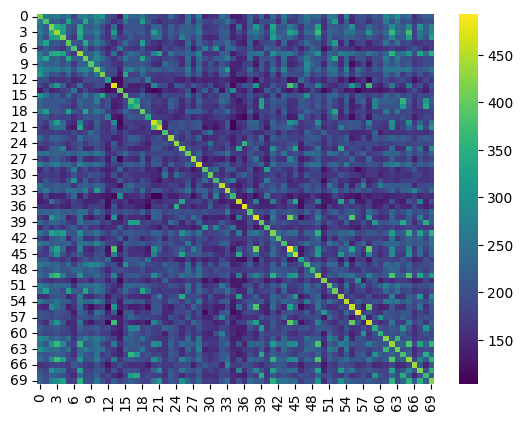

In [23]:
"""多条内容输入时，绘制相似度的heatmap"""
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# data = similarity.numpy()
# sns.heatmap(data, annot=False, cmap="viridis")
# plt.show()

In [27]:
# print(embeddings_1.shape)
# kc_emb = embeddings_1.numpy()
# np.save("arithmetic/kc_emb.npy", kc_emb)

torch.Size([70, 1024])


In [25]:
"""check"""
# kc_emb = np.load("arithmetic/kc_emb.npy")
kc_emb = np.load("./exer_embs_xes.npy")
print(kc_emb.shape)
print(np.max(kc_emb))
print(np.min(kc_emb))
print(np.mean(kc_emb))

(7652, 768)
11.21056
-7.4781833
-0.0062545715


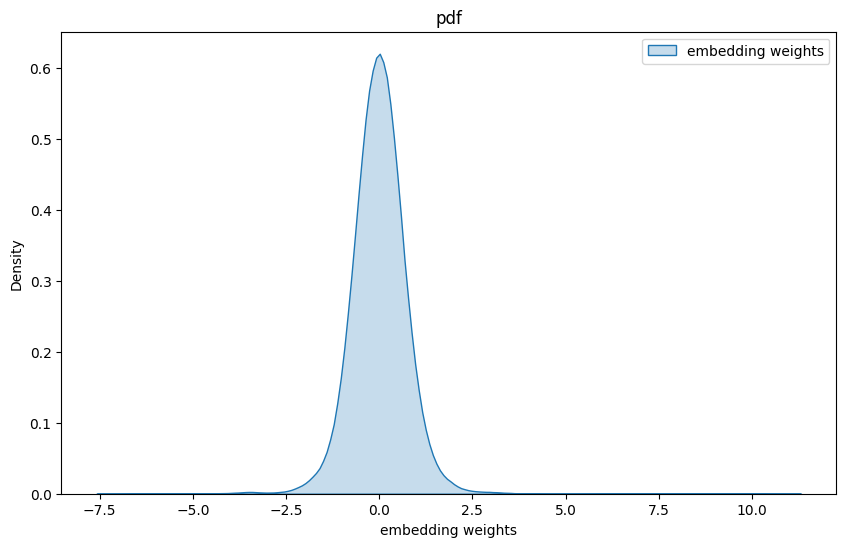

In [28]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pdf(data_in, legend='', out_path='.', textstr='', title='pdf', ylabel='Density'):
    plt.figure(figsize=(10, 6))
    # 绘制A列的PDF图
    sns.kdeplot(data_in, label=legend, fill=True)
    # 添加图例
    plt.legend()
    # 文本说明
    textstr = textstr
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    # 添加图表标题和轴标签
    plt.title(title)
    plt.xlabel(legend)
    plt.ylabel(ylabel)
    # 显示图表（Agg下无需）
    plt.show()
    # 保存图表
    plt.savefig(os.path.join(out_path, f'pdf_of_{legend}.png'))
    # 关闭，执行下一循环
    plt.close()

plot_pdf(kc_emb.flatten().tolist(), legend='embedding weights', out_path='./pics', textstr='', title='pdf', ylabel='Density')